# Minilab 2

<b>Class:</b> MSDS 7331 Data Mining
<br> <b>Dataset:</b> Belk Endowment Educational Attainment Data 

<h1 style="font-size:150%;"> Teammates </h1>
Maryam Shahini
<br> Murtada Shubbar
<br> Michael Toolin
<br> Steven Millett

In [1]:
#Set global variables
N_FEATURES_OPTIONS = [25 , 50, 100, 200, 300]
C_OPTIONS = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]

#Import data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import math
import re
import statistics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold

from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile

from sklearn.feature_selection import RFE

from sklearn.svm import SVC, LinearSVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from IPython.display import display, HTML

from sklearn.pipeline import Pipeline

from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Binarizer

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
#
# The 2017 Public Schools Machine Learning Date Set is being used throughout this analysis.  The _ML suffix is removed to less name space size
#
# Load Full Public School Data Frames for each year

school_data = pd.read_csv('../Data/2017/Machine Learning Datasets/PublicSchools2017_ML.csv', low_memory=False)



# Create Models
Create a logistic regression model and a support vector machine model for the classification task involved with your dataset. Assess how well each model performs (use 80/20 training/testing split for your data). Adjust parameters of the models to make them more accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use. That is, the SGDClassifier is fine to use for optimizing logistic regression and linear support vector machines. For many problems, SGD will be required in order to train the SVM model in a reasonable timeframe. 

In [3]:
#split data into X and y dataframes

SPG_Grade_col = school_data.filter(regex=('^SPG\WGrade')).columns
y = school_data[SPG_Grade_col].apply(lambda row:'A' if row.any()!=1 else 
                                 row[0]*'A+NG'+row[1]*'B'+row[2]*'C'+row[3]*'D'+row[4]*'F'+row[5]*'I',axis=1)

#Removed SPG Grade and unit code(which is primary key for school data table)
X = school_data[school_data.columns.drop(list(school_data.filter(regex='^SPG\WGrade|unit_code')))]




In [4]:
#split X and y into test and train sets.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [5]:
#Don't run this unless you want to retrain the data.

k_fold = KFold(n_splits=10,shuffle=True)

pipe = Pipeline([('reduce_dim', NMF()),
                 ('scale', StandardScaler()), 
                 ('clf', LogisticRegression())])


param_grid = [
    {
        'reduce_dim': [None],
        'scale':[None,StandardScaler()],
        'clf':[SVC(),LogisticRegression()],
        'clf__C': C_OPTIONS
    },
    {
        'reduce_dim': [None],
        'scale':[None,StandardScaler()],
        'clf':[SGDClassifier(tol=1e-3,max_iter=1000)],
        'clf__alpha': C_OPTIONS
    },
    {
        'reduce_dim': [NMF()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'scale':[None,StandardScaler()],
        'clf':[SVC(),LogisticRegression()],
        'clf__C': C_OPTIONS
    },
    {
        'reduce_dim': [NMF()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'scale':[None,StandardScaler()],
        'clf':[SGDClassifier(tol=1e-3,max_iter=1000)],
        'clf__alpha': C_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'scale':[None,StandardScaler()],
        'clf':[SVC(),LogisticRegression()],
        'clf__C': C_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'scale':[None,StandardScaler()],
        'clf':[SGDClassifier(tol=1e-3,max_iter=1000)],
        'clf__alpha': C_OPTIONS
    },

    
]

grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=k_fold,n_jobs=-1, verbose=1 )

grid_search.fit(X_train, y_train)

from sklearn.externals import joblib
joblib.dump(grid_search, 'savedBestModel.pkl')

Fitting 10 folds for each of 594 candidates, totalling 5940 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 688 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 1138 tasks      | elapsed: 75.6min
[Parallel(n_jobs=-1)]: Done 1688 tasks      | elapsed: 151.2min
[Parallel(n_jobs=-1)]: Done 2338 tasks      | elapsed: 232.7min
[Parallel(n_jobs=-1)]: Done 3088 tasks      | elapsed: 334.7min
[Parallel(n_jobs=-1)]: Done 3938 tasks      | elapsed: 353.4min
[Parallel(n_jobs=-1)]: Done 4888 tasks      | elapsed: 357.4min
[Parallel(n_jobs=-1)]: Done 5940 out of 5940 | elapsed: 359.5min finished


['savedBestModel.pkl']

In [5]:
#Run this to load the model

from sklearn.externals import joblib
grid_search = joblib.load('savedBestModel.pkl') 

,0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0,10000.0
SVC,0.397134,0.397134,0.397134,0.720061,0.856192,0.867963,0.866940,0.867451,0.867451
LogisticRegression,0.679120,0.801433,0.833163,0.839304,0.832139,0.814739,0.805015,0.793756,0.789150
SGDClassifier,0.824974,0.833163,0.825486,0.830092,0.801945,0.504094,0.436540,0.481576,0.437564


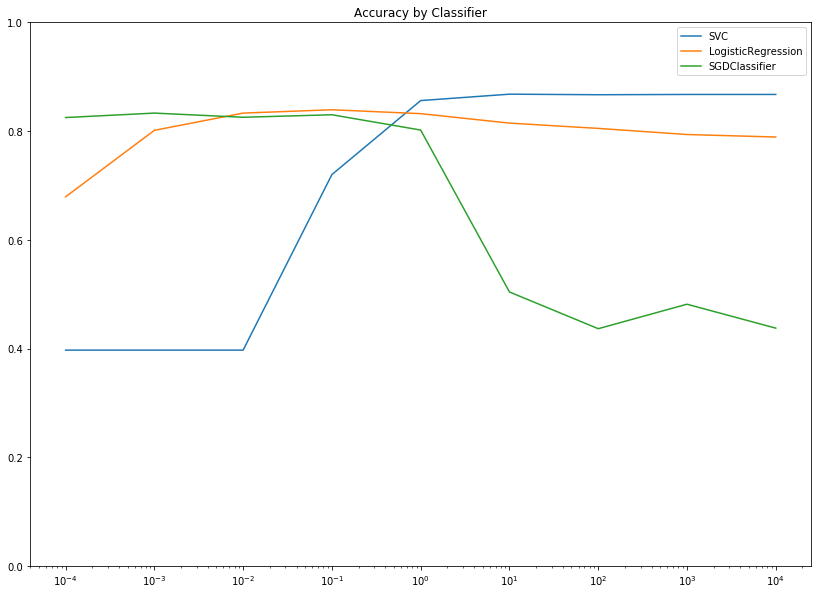

In [65]:
cv_results = grid_search.cv_results_
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_
best_params = grid_search.best_params_


params = np.array(grid_search.cv_results_['params'])
mean_scores = np.array(grid_search.cv_results_['mean_test_score'])

classifier_labels=['SVC','LogisticRegression','SGDClassifier']

classifier_temp = pd.DataFrame(columns=classifier_labels,index=C_OPTIONS,
                               data=np.linspace(.1,.25,num=len(C_OPTIONS)*len(classifier_labels)).reshape(len(C_OPTIONS),len(classifier_labels)))
classifier_temp.fillna(0,inplace=True)

for i, (param, score) in enumerate(zip(params, mean_scores)):
    C = param['clf__C'] if 'clf__C' in param else param['clf__alpha']
    class_state = str(param['clf']).split('(')[0]
    if classifier_temp.at[C,class_state] < score:
        classifier_temp.at[C,class_state] = score



        
display(classifier_temp.transpose())        
 
classifier_temp.plot(logx=True,ylim=(0,1),figsize=(14,10),title='Accuracy by Classifier'); 
    
 






,25,50,100,200,300,None
NMF,0.716991,0.719550,0.775844,0.766633,0.756397,0.864381
SelectKBest,0.624872,0.863357,0.859263,0.867963,0.861822,0.864381


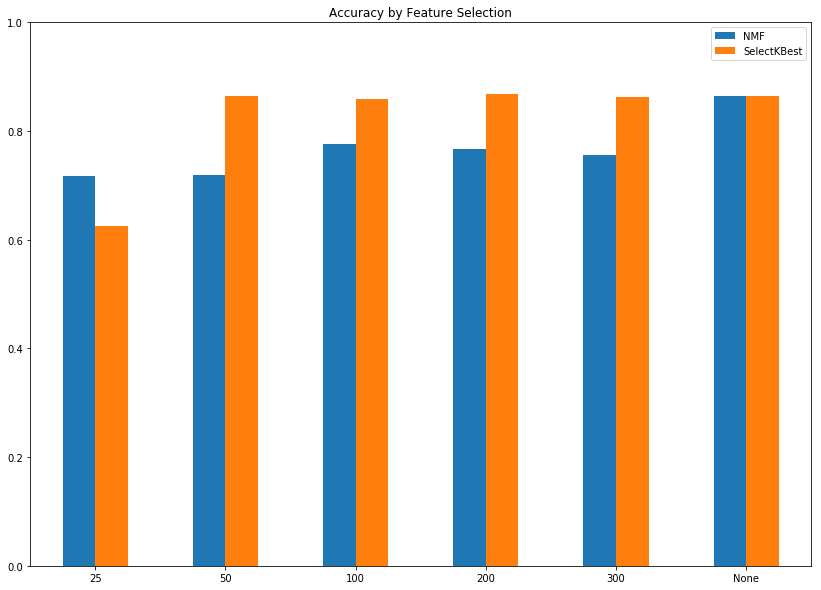

In [64]:
params = np.array(grid_search.cv_results_['params'])
mean_scores = np.array(grid_search.cv_results_['mean_test_score'])

reduce_labels=['NMF','SelectKBest']

temp_N_FEATURES_OPTIONS = [str(r) for r in N_FEATURES_OPTIONS]
temp_N_FEATURES_OPTIONS=temp_N_FEATURES_OPTIONS+['None']

reduce_temp = pd.DataFrame(columns=reduce_labels,index=temp_N_FEATURES_OPTIONS,
                               data=np.linspace(.1,.25,num=len(temp_N_FEATURES_OPTIONS)*len(reduce_labels)).reshape(+len(temp_N_FEATURES_OPTIONS),len(reduce_labels)))


for i, (param, score) in enumerate(zip(params, mean_scores)):
    trigger=0
    reduce_state = str(param['reduce_dim']).split('(')[0]
    if 'reduce_dim__k' in param:
        N_FEAT = str(param['reduce_dim__k'])
        trigger=1
    elif 'reduce_dim__n_components' in param:
        N_FEAT = str(param['reduce_dim__n_components'])
        trigger=1
    else:
        if reduce_temp.at['None','NMF'] < score:
            reduce_temp.at['None','NMF'] = score
            reduce_temp.at['None','SelectKBest'] = score
        
    if trigger == 1:
        if reduce_temp.at[N_FEAT,reduce_state] < score:
            reduce_temp.at[N_FEAT,reduce_state] = score
            

display(reduce_temp.transpose())

reduce_temp.plot(kind='bar',ylim=(0,1),figsize=(14,10),title='Accuracy by Feature Selection',rot=0);
            

In [9]:
#print(grid_search.best_estimator_)
display(grid_search.best_index_)
display(grid_search.best_params_)
display(grid_search.best_score_)

381

{'clf': SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 'clf__C': 10.0,
 'reduce_dim': SelectKBest(k=200, score_func=<function chi2 at 0x7fb4578dde18>),
 'reduce_dim__k': 200,
 'scale': StandardScaler(copy=True, with_mean=True, with_std=True)}

0.8679631525076765

# Model Advantages
Discuss the advantages of each model for each classification task. Does one type of model offer superior performance over another in terms of prediction accuracy? In terms of training time or efficiency? Explain in detail.

Looking at the accuracy of the two models there are a couple of obvious observations.

1. SVM is negatively to non-standardized observations.
2. Logistic Regression ...

# Interpret Feature Importance
Use the weights from logistic regression to interpret the importance of different features for the classification task. Explain your interpretation in detail. Why do you think some variables are more important?


# Interpret Support Vectors
Look at the chosen support vectors for the classification task. Do these provide any insight into the data? Explain. If you used stochastic gradient descent (and therefore did not explicitly solve for support vectors), try subsampling your data to train the SVC model— then analyze the support vectors from the subsampled dataset.